### Estadística para Ciencia de los Datos
### Tarea #5 
Juan Pablo Fernandez Delgado

###**Punto #1 Tamano de la muestra**

La confianza es de = 95% --> Z= 1.96,    P= q =0.5
E = 0.02 

\begin{equation}
z=\frac{1.96^{2}-0.5^{2}}{0.02^{2}}
\end{equation}



\begin{equation}
z=\frac{0.9604}{0.0004}=2401
\end{equation}

R/ El tamano de la muestra para que compla los requerimientos es de 2401.

###**Punto #2 Remuestreo**

In [0]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import io

In [0]:
data = pn.read_csv('https://raw.githubusercontent.com/jpablofdez/DataScience/master/Estadistica/Tareas/Tarea5/pima-indians-diabetes.csv',sep=';')

In [0]:
 data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# Metodo que genera los 3 procedimientos bootstrap con R=70 , R=500 y R=1000 de tamaño n=618
def bootstrapMethod(n):
  sample_boot = []
  for _ in range(n):
    sample = np.random.choice(data['x4'], size=618, replace=True)
    sample_boot.append(sample.std())

  bootstrap = DataFrame (sample_boot,columns=['x4'])
  bootstrap.head(20)
  var = np.median(bootstrap)
  std = np.std(bootstrap)
  mean = np.mean(bootstrap)
  #print ("Varianza muestral:{}, La media :{} y la desviacion estandar{}").format(var,sigma, mu)
  print ("La Varianza muestral :{}".format(var))
  print ("La Media :{}".format(mean))
  print ("La Desviacion estandar :{}".format(std))
  print("############################# ")
  print("Histograma TVHR")
  plt.figure()
  p1=plt.hist(sample_boot)
  plt.ylabel("Probability")
  plt.title("Distribución de Columna: Grosor ")
  plt.show(p1)
  #return bootstrap.describe()

La Varianza muestral :15.901779329949683
La Media :x4    15.91867
dtype: float64
La Desviacion estandar :x4    0.388553
dtype: float64
############################# 
Histograma TVHR


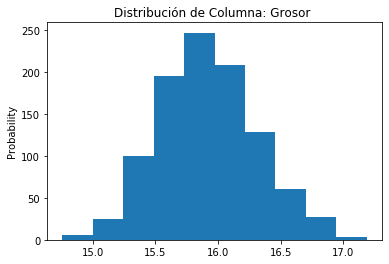

In [0]:
 # Aplicamos un bootstrap con  R=1000  
bootstrapMethod(1000)
 

In [0]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
data['x4'].describe() 

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: x4, dtype: float64

**Punto 3. Tratamiento de valores perdidos:**


In [0]:
dataInput = data

In [0]:
#Tratamiento de valores nulos
print(dataInput.iloc[:,4:6].describe())

               x5          x6
count  394.000000  768.000000
mean   155.548223   31.992578
std    118.775855    7.884160
min     14.000000    0.000000
25%     76.250000   27.300000
50%    125.000000   32.000000
75%    190.000000   36.600000
max    846.000000   67.100000


In [0]:
#Asignar como NaN y eliminar las observaciones
dataInput.iloc[:,3:5]=dataInput.iloc[:,3:5].replace(0,np.NaN)
print("Número de observaciones NaN por columna: ")
print(dataInput.isnull().sum())

Número de observaciones NaN por columna: 
x1            0
x2            0
x3            0
x4          227
x5          374
x6            0
x7            0
x8            0
diabetes      0
dtype: int64


In [0]:
# Cargar de nuevo el dataset
dataNuevo = pn.read_csv('https://raw.githubusercontent.com/jpablofdez/DataScience/master/Estadistica/Tareas/Tarea5/pima-indians-diabetes.csv',sep=';')

In [0]:
print(dataNuevo.iloc[:,3:5].describe())

               x4          x5
count  768.000000  768.000000
mean    20.536458   79.799479
std     15.952218  115.244002
min      0.000000    0.000000
25%      0.000000    0.000000
50%     23.000000   30.500000
75%     32.000000  127.250000
max     99.000000  846.000000


In [0]:
# sustituimos valores, por la media
dataNuevo.iloc[:,3:5]=dataNuevo.iloc[:,3:5].replace(0,dataNuevo.iloc[:,3:5].mean())

print(dataNuevo.iloc[:,3:5].describe())

               x4          x5
count  768.000000  768.000000
mean    26.606479  118.660163
std      9.631241   93.080358
min      7.000000   14.000000
25%     20.536458   79.799479
50%     23.000000   79.799479
75%     32.000000  127.250000
max     99.000000  846.000000


Una de las mejores tecticas de sustitucion de datos es sustituir los valores por la media, ya que seria un promedio más cercano para hacer predicciones, que con cualquier otro valor al azar.

**Punto 4 Diseño de experimentos**

In [0]:
pip install researchpy

In [0]:
import pandas as pn
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f


In [0]:
anova = pn.read_csv('https://raw.githubusercontent.com/jpablofdez/DataScience/master/Estadistica/Tareas/Tarea5/ventanilla.csv',sep=';')

In [0]:
anova.head()

,y,tiempo
0,9,10
1,12,10
2,10,10
3,8,10
4,15,10


In [0]:

#descriptivas
print(rp.summary_cont(anova['y']))
print(rp.summary_cont(anova['y'].groupby(anova['tiempo'])))



  Variable     N  Mean        SD        SE  95% Conf.   Interval
0        y  15.0  13.8  7.301663  1.885281   9.756474  17.843526


        N  Mean        SD        SE  95% Conf.   Interval
tiempo                                                   
10      5  10.8  2.774887  1.240967   8.080610  13.519390
20      5  22.2  4.868265  2.177154  17.429101  26.970899
30      5   8.4  4.393177  1.964688   4.094687  12.705313


In [0]:
##modelo lineal
results = ols('y ~ C(tiempo)', data=anova).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     16.08
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           0.000402
Time:                        22:56:17   Log-Likelihood:                -40.815
No. Observations:                  15   AIC:                             87.63
Df Residuals:                      12   BIC:                             89.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8000      1.838     

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [0]:
##ANOVA
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

           sum_sq    df         F    PR(>F)
C(tiempo)   543.6   2.0  16.08284  0.000402
Residual    202.8  12.0       NaN       NaN


###Evaluación de la prueba de hipótesis

Tomando como base las dos proporciones anteriores, definimos una estadística que nos permitirá aceptar o rechazar la hipótesis:

\begin{equation}
F_0=\dfrac{\textrm{MS}_\textrm{tratamiento}}{\textrm{MS}_\textrm{error}}
\end{equation}



\begin{equation}
F_0=\dfrac{\dfrac{543.6}{2}}{\dfrac{202.8}{12}}
\end{equation}

\begin{equation}
F_0=16.0828
\end{equation}

In [0]:
#Valor crítico
#gl numerador=a-1=2
#gl denominador=N-a=12
print(f.ppf(0.95, 2, 12))

3.8852938346523933
